Reference: https://www.kaggle.com/suzanaiacob/predicting-credit-card-balance-using-regression

**Goal : Predict Balance of individuals**

In [1]:
import os
os.getcwd()

'C:\\Users\\namrata\\AI practice\\AI Projects'

In [8]:
os.chdir("C:/Users/namrata/Desktop/projects/credit")

In [9]:
os.getcwd()

'C:\\Users\\namrata\\Desktop\\projects\\credit'

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [17]:
data = pd.read_csv('Credit.csv')

In [18]:
data.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


**Let us check quantitative variables**

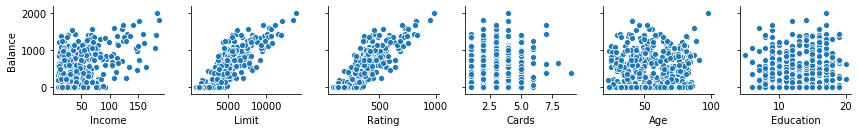

In [22]:
sns.pairplot(data, x_vars=['Income','Limit','Rating','Cards','Age','Education'], y_vars='Balance', size = 2)

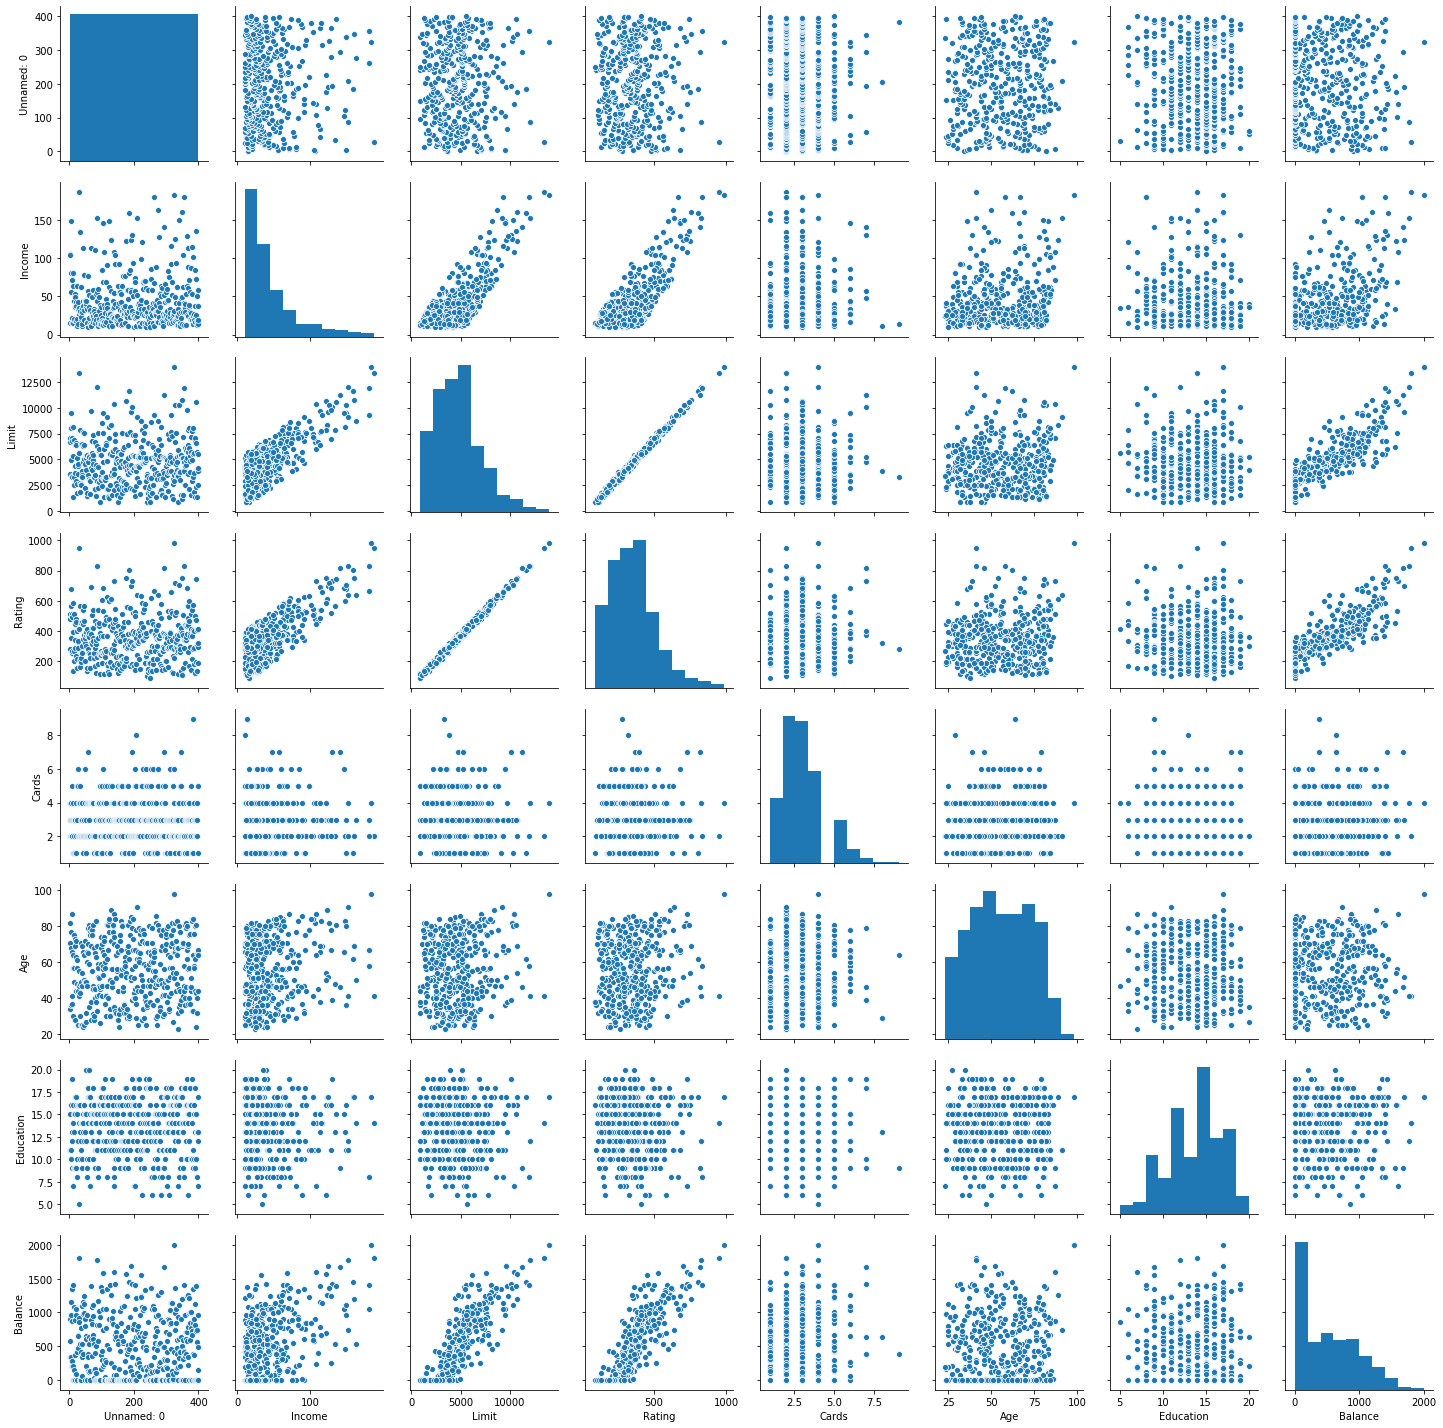

In [67]:
sns.pairplot(data)

It seems limit, income and rating are affecting the balance

**Let us check qualitative variables**

In [23]:
data.describe(include=['object'])

,Gender,Student,Married,Ethnicity
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


**Target variable:Balance**

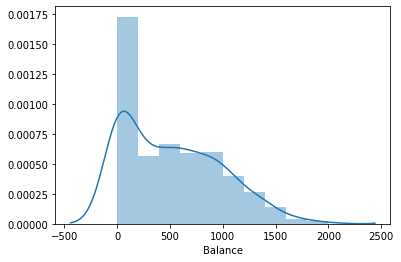

In [25]:
sns.distplot(data.Balance)

In [30]:
data2 = data.loc[data.Balance>0,].copy()

In [31]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    310 non-null int64
Income        310 non-null float64
Limit         310 non-null int64
Rating        310 non-null int64
Cards         310 non-null int64
Age           310 non-null int64
Education     310 non-null int64
Gender        310 non-null object
Student       310 non-null object
Married       310 non-null object
Ethnicity     310 non-null object
Balance       310 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 31.5+ KB


**Exploring quantitative/numeircal variables**

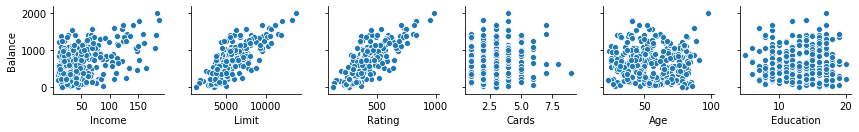

In [32]:
sns.pairplot(data2, x_vars=['Income','Limit','Rating','Cards','Age','Education'], y_vars='Balance', size = 2)

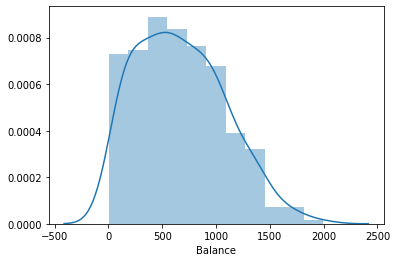

In [33]:
sns.distplot(data2.Balance) #looks like normal distribution

In [34]:
data['Active'] = np.where(data['Balance']>0, 'Yes', 'No')  
data.Active.describe()

count     400
unique      2
top       Yes
freq      310
Name: Active, dtype: object

In [35]:
data.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Active
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,Yes
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,Yes
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,Yes
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,Yes
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,Yes


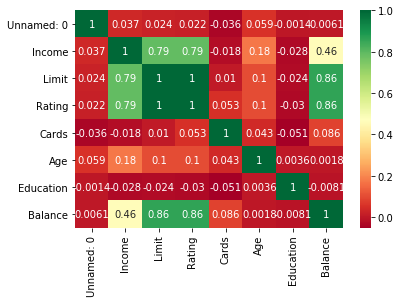

In [36]:
sns.heatmap(data.corr(), cmap="RdYlGn", annot = True)

limit and rating seems correlated with income  
limit and rating are highyl correlated  
we do not know if the correlation are statistically significant  

In [37]:
from scipy.stats import pearsonr
r1, p1 = pearsonr(data.Balance, data.Limit)
msg = "Correlation coefficient Balance-Limit: {}\n p-value: {}\n"
print(msg.format(r1, p1))

r2, p2 = pearsonr(data.Balance, data.Rating)
msg = "Correlation coefficient Balance-Rating: {}\n p-value: {}\n"
print(msg.format(r2, p2))

r3, p3 = pearsonr(data.Balance, data.Income)
msg = "Correlation coefficient Balance-Income: {}\n p-value: {}\n"
print(msg.format(r3, p3))

r4, p4 = pearsonr(data.Limit, data.Rating)
msg = "Correlation coefficient Limit-Rating: {}\n p-value: {}\n"
print(msg.format(r4, p4))

r5, p5 = pearsonr(data.Limit, data.Income)
msg = "Correlation coefficient Limit-Income: {}\n p-value: {}\n"
print(msg.format(r5, p5))

r6, p6 = pearsonr(data.Rating, data.Income)
msg = "Correlation coefficient Rating-Income: {}\n p-value: {}\n"
print(msg.format(r6, p6))

Correlation coefficient Balance-Limit: 0.8616972670153954
 p-value: 2.5305807117137046e-119

Correlation coefficient Balance-Rating: 0.8636251606214953
 p-value: 1.8988990970400204e-120

Correlation coefficient Balance-Income: 0.46365645701575736
 p-value: 1.0308858025894099e-22

Correlation coefficient Limit-Rating: 0.9968797370016825
 p-value: 0.0

Correlation coefficient Limit-Income: 0.7920883413369414
 p-value: 2.391789442285437e-87

Correlation coefficient Rating-Income: 0.7913776251121217
 p-value: 4.362691443090436e-87



All the relationships are significant. Additionally Limit and Rating have a remarkably high correlation coefficient.

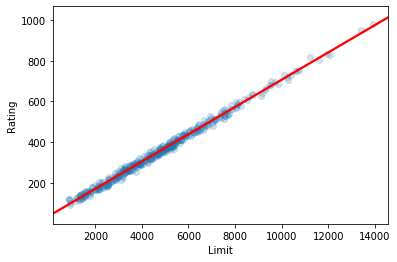

In [39]:
sns.regplot(x='Limit',
           y='Rating',
           data=data,
           scatter_kws={'alpha':0.2},
           line_kws={'color':'red'}
           )

Limit and Rating are highly correlated, introducing multi-colinearity in the model.
We may remove one variable as they are highly correlated

**Exploring qualitative/categorical varaibles**

Ethnicity
African American    AxesSubplot(0.555556,0.125;0.344444x0.328261)
Asian               AxesSubplot(0.555556,0.125;0.344444x0.328261)
Caucasian           AxesSubplot(0.555556,0.125;0.344444x0.328261)
Name: Balance, dtype: object

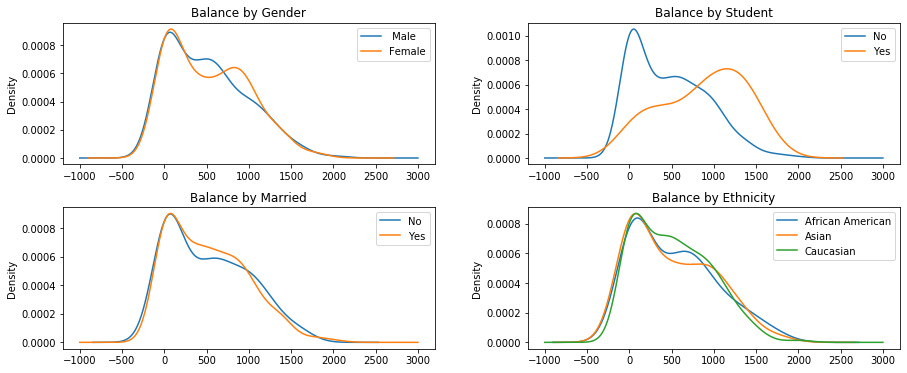

In [44]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=.3, wspace=.25)
data.groupby('Gender').Balance.plot(kind='kde', ax=axes[0][0], legend=True, title='Balance by Gender')
data.groupby('Student').Balance.plot(kind='kde', ax=axes[0][1], legend=True, title='Balance by Student')
data.groupby('Married').Balance.plot(kind='kde', ax=axes[1][0], legend=True, title='Balance by Married')
data.groupby('Ethnicity').Balance.plot(kind='kde', ax=axes[1][1], legend=True, title='Balance by Ethnicity')

Ethnicity
African American    AxesSubplot(0.555556,0.125;0.344444x0.328261)
Asian               AxesSubplot(0.555556,0.125;0.344444x0.328261)
Caucasian           AxesSubplot(0.555556,0.125;0.344444x0.328261)
Name: Balance, dtype: object

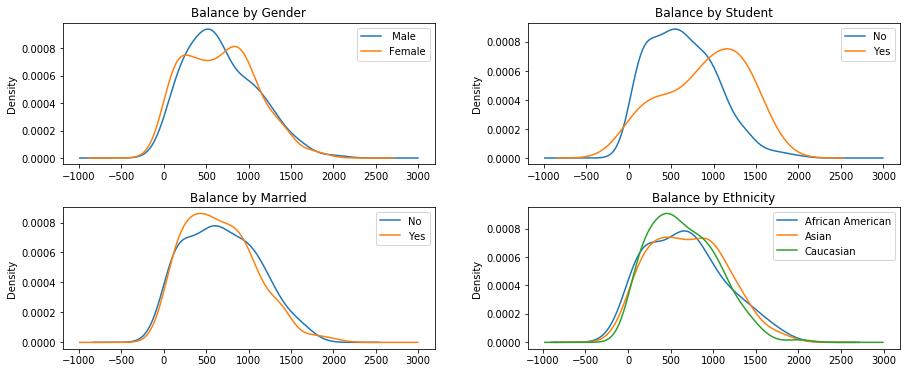

In [45]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=.3, wspace=.25)
data2.groupby('Gender').Balance.plot(kind='kde', ax=axes[0][0], legend=True, title='Balance by Gender')
data2.groupby('Student').Balance.plot(kind='kde', ax=axes[0][1], legend=True, title='Balance by Student')
data2.groupby('Married').Balance.plot(kind='kde', ax=axes[1][0], legend=True, title='Balance by Married')
data2.groupby('Ethnicity').Balance.plot(kind='kde', ax=axes[1][1], legend=True, title='Balance by Ethnicity')


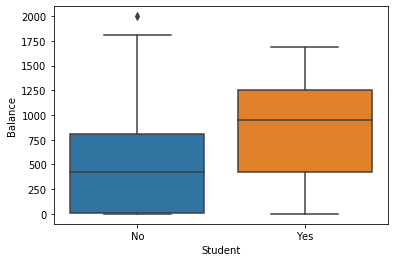

In [46]:
sns.boxplot(x='Student', y='Balance', data = data)

In [49]:
mod0 = smf.ols('Balance ~ Income + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity', data = data).fit()
mod0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     757.8
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          4.46e-248
Time:                        09:51:10   Log-Likelihood:                -2415.4
No. Observations:                 400   AIC:                             4853.
Df Residuals:                     389   BIC:                             4897.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -549.3140     35.085    -15.657      0.000    -618.293    -480.335
Gender[T.Female]         -10.7106     10.325     -1.037      0.300     -31.010       9.589
Student[T.Yes]           416.4376     17.336     24.021      0.000     382.353     450.522
Married[T.Yes]           -15.1096     10.728     -1.408      0.160     -36.202       5.983
Ethnicity[T.Asian]        21.7616     14.678      1.483      0.139      -7.096      50.619
Ethnicity[T.Caucasian]    10.6492     12.716      0.837      0.403     -14.351      35.649
Income                    -7.7746      0.244    -31.878      0.000      -8.254      -7.295
Rating                     3.9790      0.055     72.332      0.000       3.871       4.087
Cards                      3.9654      3.793      1.045      0.296      -3.492      11.422
Age                       -0.6416      0.306     -2.096      0.037      -1.243      -0.040
Education                 -0.3799      1.659     -0.229      0.819      -3.642       2.882
==============================================================================
Omnibus:                       15.651   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.769
Skew:                           0.490   Prob(JB):                     0.000228
Kurtosis:                       2.789   Cond. No.                     2.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
data2mod0 = smf.ols('Balance ~ Income + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity', data = data2).fit()
data2mod0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1918.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.38e-264
Time:                        13:22:42   Log-Likelihood:                -1659.9
No. Observations:                 310   AIC:                             3342.
Df Residuals:                     299   BIC:                             3383.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -791.3689     21.193    -37.340      0.000    -833.076    -749.662
Gender[T.Female]          -2.6107      5.961     -0.438      0.662     -14.341       9.119
Student[T.Yes]           478.1566      9.239     51.752      0.000     459.974     496.339
Married[T.Yes]           -14.0808      6.221     -2.263      0.024     -26.324      -1.837
Ethnicity[T.Asian]         4.1786      8.590      0.486      0.627     -12.726      21.083
Ethnicity[T.Caucasian]    -1.8990      7.284     -0.261      0.794     -16.233      12.435
Income                    -9.7126      0.145    -66.859      0.000      -9.999      -9.427
Rating                     4.7767      0.040    120.602      0.000       4.699       4.855
Cards                      3.0923      2.102      1.471      0.142      -1.045       7.229
Age                       -1.1431      0.176     -6.481      0.000      -1.490      -0.796
Education                  1.2817      0.938      1.366      0.173      -0.564       3.128
==============================================================================
Omnibus:                        2.652   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                2.433
Skew:                          -0.139   Prob(JB):                        0.296
Kurtosis:                       2.666   Cond. No.                     3.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
mod1 = smf.ols('Balance ~ Income + Rating + Age + Student', data = data).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1892.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          4.17e-256
Time:                        13:24:28   Log-Likelihood:                -2418.6
No. Observations:                 400   AIC:                             4847.
Df Residuals:                     395   BIC:                             4867.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -547.3047     21.461    -25.503      0.000    -589.496    -505.113
Student[T.Yes]   417.5056     17.172     24.314      0.000     383.746     451.265
Income            -7.7977      0.242    -32.198      0.000      -8.274      -7.322
Rating             3.9807      0.055     72.927      0.000       3.873       4.088
Age               -0.6242      0.304     -2.053      0.041      -1.222      -0.026
==============================================================================
Omnibus:                       15.838   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.000
Skew:                           0.494   Prob(JB):                     0.000203
Kurtosis:                       2.793   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Now exploring 4 significant variables**  
**Numerical: Income, Rating and Age**  
**Categorical: Student**

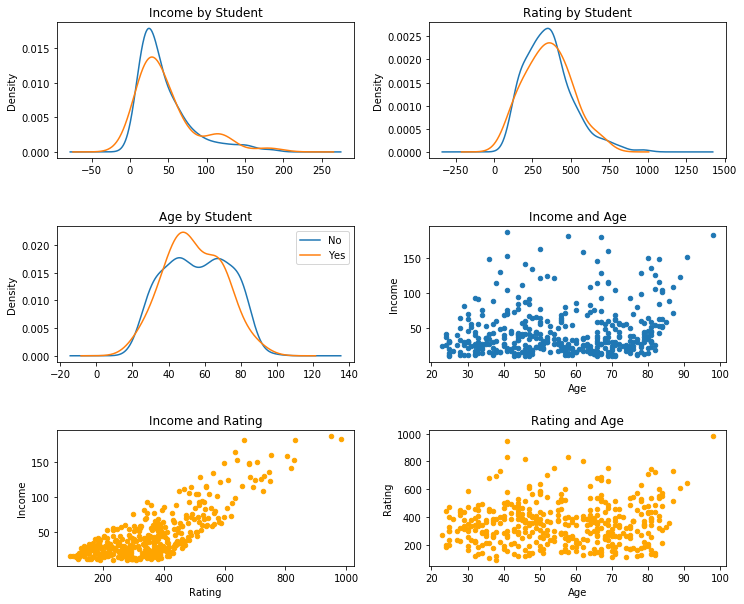

In [55]:
f, axes = plt.subplots(3, 2, figsize=(12, 10))
f.subplots_adjust(hspace=.5, wspace=.25)

data.groupby('Student').Income.plot(kind='kde', ax=axes[0][0], title='Income by Student')
data.groupby('Student').Rating.plot(kind='kde', ax=axes[0][1], title='Rating by Student')
data.groupby('Student').Age.plot(kind='kde', ax=axes[1][0], legend=True, title='Age by Student')

data.plot(kind='scatter', x='Age' , y='Income' , ax=axes[1][1], title='Income and Age')
data.plot(kind='scatter', x='Age' , y='Rating' , ax=axes[2][1], color='orange', title='Rating and Age')
data.plot(kind='scatter', x='Rating' , y='Income' , ax=axes[2][0], color='orange', title='Income and Rating')


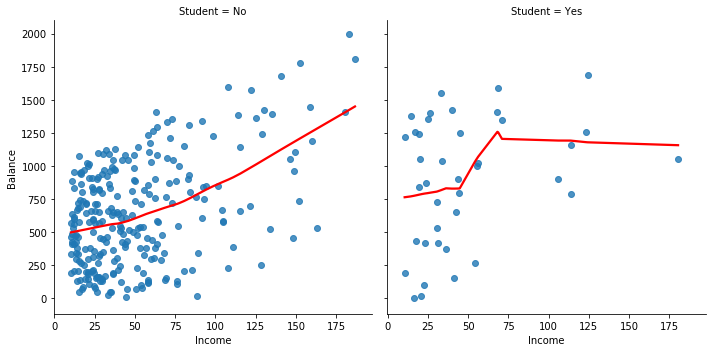

In [57]:
sns.lmplot(x='Income',
          y='Balance',
          data=data2,
          line_kws={'color':'red'},
          lowess=True,
          col='Student')

In [58]:
mod2 = smf.ols('Balance ~ Income + I(Income**2) + Age + Student + Rating', data = data).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1524.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          3.68e-255
Time:                        13:49:35   Log-Likelihood:                -2416.9
No. Observations:                 400   AIC:                             4846.
Df Residuals:                     394   BIC:                             4870.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -527.6722     23.950    -22.032      0.000    -574.757    -480.587
Student[T.Yes]   416.9706     17.124     24.350      0.000     383.305     450.636
Income            -8.6268      0.514    -16.768      0.000      -9.638      -7.615
I(Income ** 2)     0.0055      0.003      1.825      0.069      -0.000       0.011
Age               -0.6161      0.303     -2.032      0.043      -1.212      -0.020
Rating             3.9790      0.054     73.098      0.000       3.872       4.086
==============================================================================
Omnibus:                       14.185   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.920
Skew:                           0.456   Prob(JB):                     0.000576
Kurtosis:                       2.748   Cond. No.                     3.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

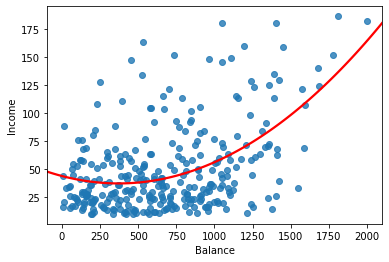

In [60]:
sns.regplot('Balance', 'Income',
           data = data2,
           ci=None,
           order=2,
           line_kws={'color':'red'})

In [61]:
mod3 = smf.ols('Balance ~ Income + I(Income**2) + Age + Student + Income*Rating', data = data).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1458.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          5.13e-265
Time:                        13:51:30   Log-Likelihood:                -2390.0
No. Observations:                 400   AIC:                             4794.
Df Residuals:                     393   BIC:                             4822.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -429.1239     25.969    -16.524      0.000    -480.180    -378.068
Student[T.Yes]   425.7135     16.073     26.487      0.000     394.114     457.313
Income            -9.0837      0.485    -18.712      0.000     -10.038      -8.129
I(Income ** 2)    -0.0329      0.006     -5.638      0.000      -0.044      -0.021
Age               -0.6821      0.284     -2.402      0.017      -1.240      -0.124
Rating             3.4940      0.082     42.515      0.000       3.332       3.656
Income:Rating      0.0110      0.001      7.521      0.000       0.008       0.014
==============================================================================
Omnibus:                        7.324   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.374
Skew:                           0.237   Prob(JB):                       0.0413
Kurtosis:                       2.604   Cond. No.                     1.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
mod4 = smf.ols('Balance ~ Income + I(Income**2) + Rating + Age + Student + Education*Income', data = data).fit()
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1096.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          5.89e-253
Time:                        13:52:12   Log-Likelihood:                -2414.6
No. Observations:                 400   AIC:                             4845.
Df Residuals:                     392   BIC:                             4877.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -455.5497     44.548    -10.226      0.000    -543.133    -367.966
Student[T.Yes]     416.8402     17.116     24.354      0.000     383.189     450.491
Income              -9.9373      0.807    -12.308      0.000     -11.525      -8.350
I(Income ** 2)       0.0060      0.003      1.977      0.049    3.17e-05       0.012
Rating               3.9711      0.054     73.019      0.000       3.864       4.078
Age                 -0.6240      0.302     -2.064      0.040      -1.218      -0.030
Education           -5.0695      2.673     -1.897      0.059     -10.324       0.185
Education:Income     0.0943      0.045      2.091      0.037       0.006       0.183
==============================================================================
Omnibus:                       13.655   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.400
Skew:                           0.450   Prob(JB):                     0.000747
Kurtosis:                       2.771   Cond. No.                     5.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
mod5 = smf.ols('Balance ~ Income + I(Income**2) + Rating + Age + Student + Married*Age', data = data).fit()
mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1101.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          2.35e-253
Time:                        13:52:59   Log-Likelihood:                -2413.6
No. Observations:                 400   AIC:                             4843.
Df Residuals:                     392   BIC:                             4875.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -561.6504     32.973    -17.033      0.000    -626.477    -496.823
Student[T.Yes]       417.3806     17.121     24.378      0.000     383.720     451.041
Married[T.Yes]        58.2726     35.992      1.619      0.106     -12.489     129.035
Income                -8.6631      0.512    -16.924      0.000      -9.670      -7.657
I(Income ** 2)         0.0059      0.003      1.949      0.052   -5.12e-05       0.012
Rating                 3.9786      0.054     73.496      0.000       3.872       4.085
Age                    0.1420      0.481      0.295      0.768      -0.804       1.088
Married[T.Yes]:Age    -1.2944      0.611     -2.118      0.035      -2.496      -0.093
==============================================================================
Omnibus:                       12.889   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.569
Skew:                           0.438   Prob(JB):                      0.00113
Kurtosis:                       2.786   Cond. No.                     5.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

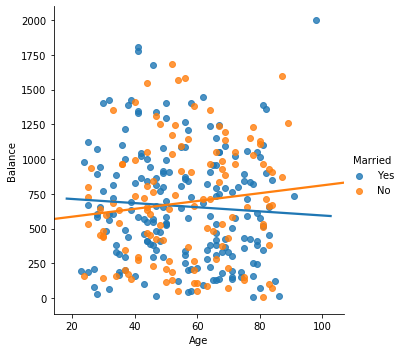

In [64]:
sns.lmplot(x="Age", 
           y="Balance", 
           hue="Married", 
           ci=None,
           data=data2);

In [65]:
mod6 = smf.ols('Balance ~ Income + I(Income**2) + Rating + Age + Student + Gender*Cards', data = data).fit()
mod6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     961.4
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          7.75e-252
Time:                        13:54:01   Log-Likelihood:                -2413.6
No. Observations:                 400   AIC:                             4845.
Df Residuals:                     391   BIC:                             4881.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -505.5063     29.280    -17.264      0.000    -563.073    -447.939
Student[T.Yes]           414.7916     17.165     24.165      0.000     381.045     448.538
Gender[T.Female]         -56.9505     24.573     -2.318      0.021    -105.262      -8.639
Income                    -8.6253      0.514    -16.766      0.000      -9.637      -7.614
I(Income ** 2)             0.0058      0.003      1.932      0.054      -0.000       0.012
Rating                     3.9674      0.055     72.561      0.000       3.860       4.075
Age                       -0.6826      0.303     -2.250      0.025      -1.279      -0.086
Cards                     -3.2603      5.083     -0.641      0.522     -13.254       6.734
Gender[T.Female]:Cards    15.7543      7.584      2.077      0.038       0.843      30.666
==============================================================================
Omnibus:                       13.489   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.150
Skew:                           0.444   Prob(JB):                     0.000846
Kurtosis:                       2.755   Cond. No.                     4.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

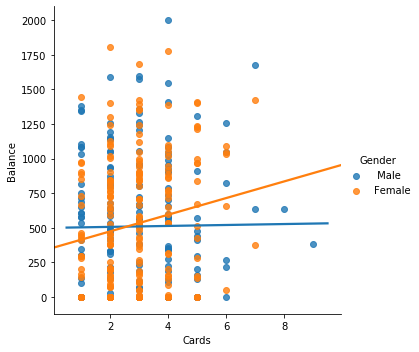

In [66]:
sns.lmplot(x="Cards", 
           y="Balance", 
           hue="Gender", 
           ci=None,
           data = data);